## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print(os.listdir('../input'))

['Ireland-crime1.csv']


In [2]:
Ireland_crime1 = pd.read_csv("../input/Ireland-crime1.csv")
Ireland_crime1.head()

,id,Station,Divisions,Year,Number.of.Crime.Record
0,20675.0,Cavan,Cavan/Monaghan Division,2007,7127
1,NaN,NaN,Cavan/Monaghan Division,2008,6686
2,NaN,NaN,Cavan/Monaghan Division,2009,6083
3,NaN,NaN,Cavan/Monaghan Division,2010,6081
4,NaN,NaN,Cavan/Monaghan Division,2011,5752


In [3]:
Ireland_crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
id                        21 non-null float64
Station                   21 non-null object
Divisions                 252 non-null object
Year                      252 non-null int64
Number.of.Crime.Record    252 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ KB


In [4]:
Ireland_crime1.isnull().sum()
Ireland_crime1 = Ireland_crime1.drop("id",axis = 1)

In [5]:
Ireland_crime1.head()

,Station,Divisions,Year,Number.of.Crime.Record
0,Cavan,Cavan/Monaghan Division,2007,7127
1,NaN,Cavan/Monaghan Division,2008,6686
2,NaN,Cavan/Monaghan Division,2009,6083
3,NaN,Cavan/Monaghan Division,2010,6081
4,NaN,Cavan/Monaghan Division,2011,5752


In [6]:
Ireland_crime2 = Ireland_crime1[["Divisions","Year","Number.of.Crime.Record"]]
Ireland_crime2.head()

,Divisions,Year,Number.of.Crime.Record
0,Cavan/Monaghan Division,2007,7127
1,Cavan/Monaghan Division,2008,6686
2,Cavan/Monaghan Division,2009,6083
3,Cavan/Monaghan Division,2010,6081
4,Cavan/Monaghan Division,2011,5752


In [7]:
Ireland_crime1.iloc[0]

Station                                     Cavan
Divisions                 Cavan/Monaghan Division
Year                                         2007
Number.of.Crime.Record                       7127
Name: 0, dtype: object

In [8]:
def standard_plot(title=None, x=None, y=None):
    
    fig, ax = plt.subplots(figsize=(20,4), dpi=80)
    
    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(14)
   
    if title != None:
        ax.set_title(title)
        ax.title.set_fontsize(15)
        
    if x != None:
        ax.set_xlabel(x)
        
    if y != None:
        ax.set_ylabel(y)
          
    return fig, ax

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


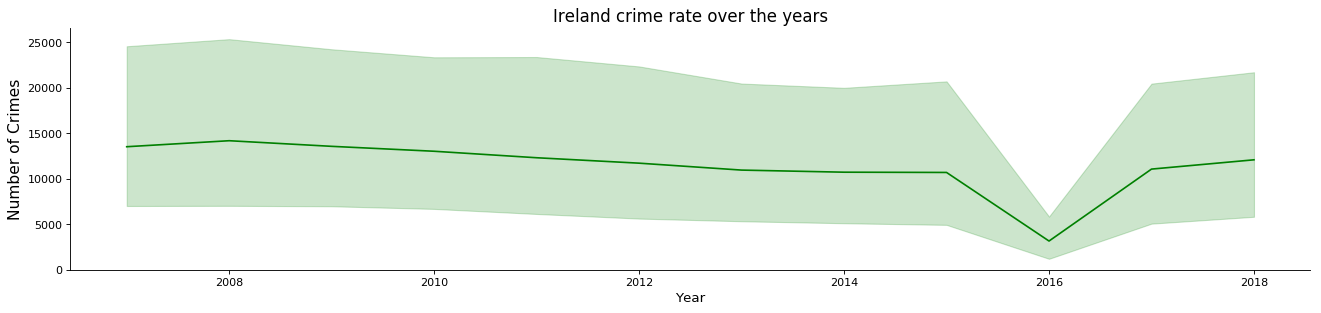

In [9]:
fig, ax = standard_plot('Ireland crime rate over the years')
sns.lineplot(data=Ireland_crime1, x='Year', y='Number.of.Crime.Record', color='green', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes');

In [10]:
# Conclusion:
#     1. Crime rate in Ireland was lowest in 2016.
#     2. Crime rate was highest in 2008.
#     3. Rate was almost constant from 2008 to 2015.
#     4. Crime rate increased recently in 2018.  

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


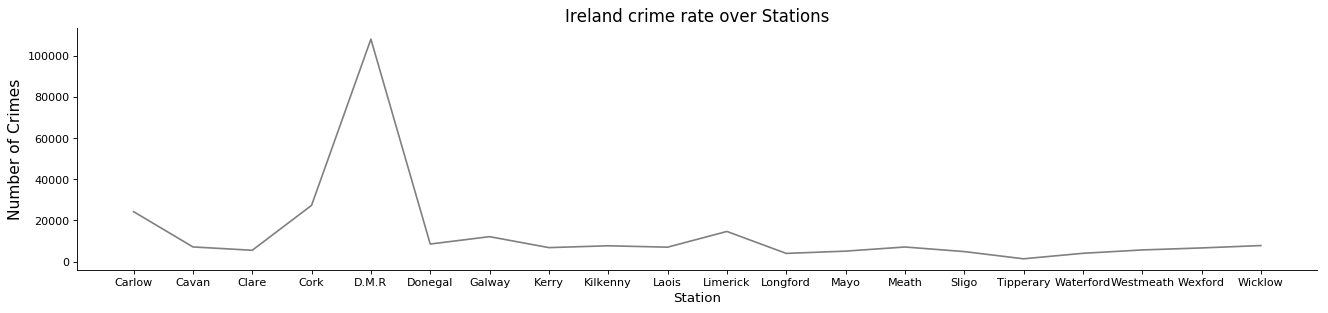

In [11]:
fig, ax = standard_plot('Ireland crime rate over Stations')
sns.lineplot(data=Ireland_crime1, x='Station', y='Number.of.Crime.Record', color='gray', ax=ax)
ax.set_xlabel('Station')
ax.set_ylabel('Number of Crimes');

In [12]:
# Conclusion:
#     1. Crimes in D.M.R. station was highest.
#     2. Crimes in Tipperary station was lowest.
#     3. Cork and Carlow holds the second position of Crime rate in Ireland

In [13]:
# Let's plot yearly rate of some highest crime places in Ireland Divisions.

df = Ireland_crime2.set_index("Divisions")
df
df1_dmr = df.loc[["Total D.M.R. Division"]]
df2_carlow = df.loc[["Total Carlow Division"]]
df3_cork = df.loc[["Total Cork Division"]]

Text(0, 0.5, 'Number of Crimes')

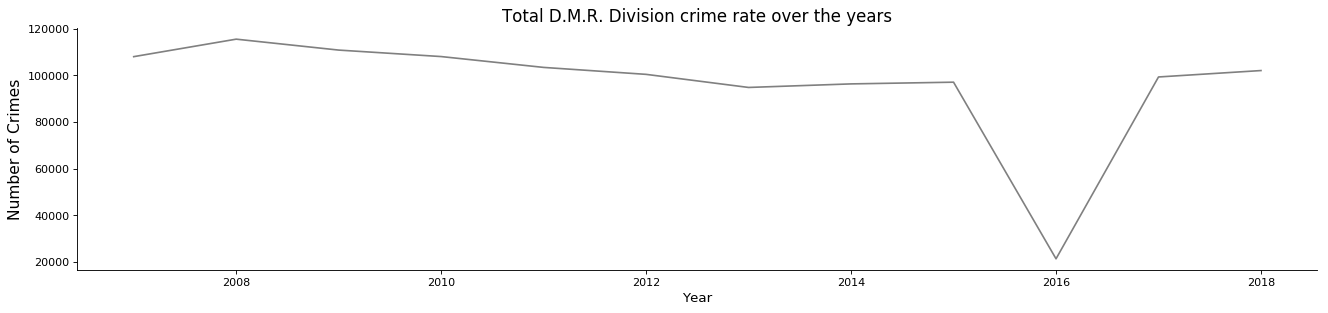

In [14]:
fig, ax = standard_plot('Total D.M.R. Division crime rate over the years')
sns.lineplot(data = df1_dmr, x='Year', y='Number.of.Crime.Record', color='gray', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

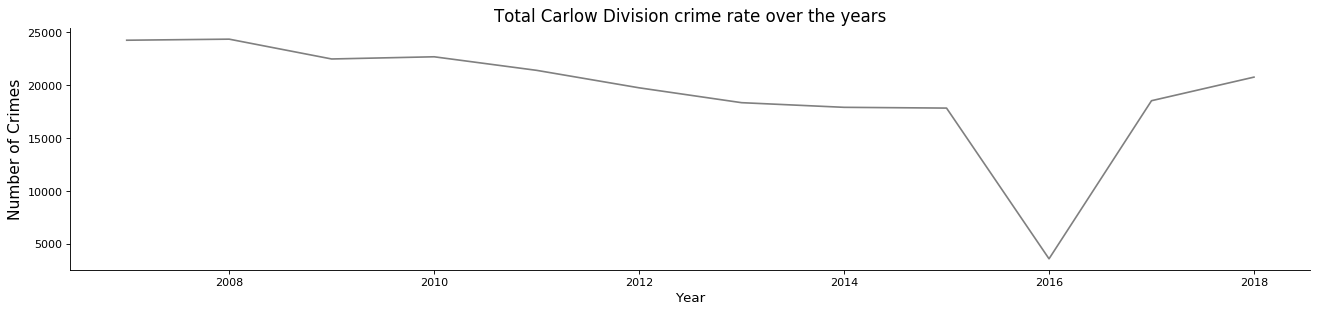

In [15]:
fig, ax = standard_plot('Total Carlow Division crime rate over the years')
sns.lineplot(data = df2_carlow, x='Year', y='Number.of.Crime.Record', color='gray', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

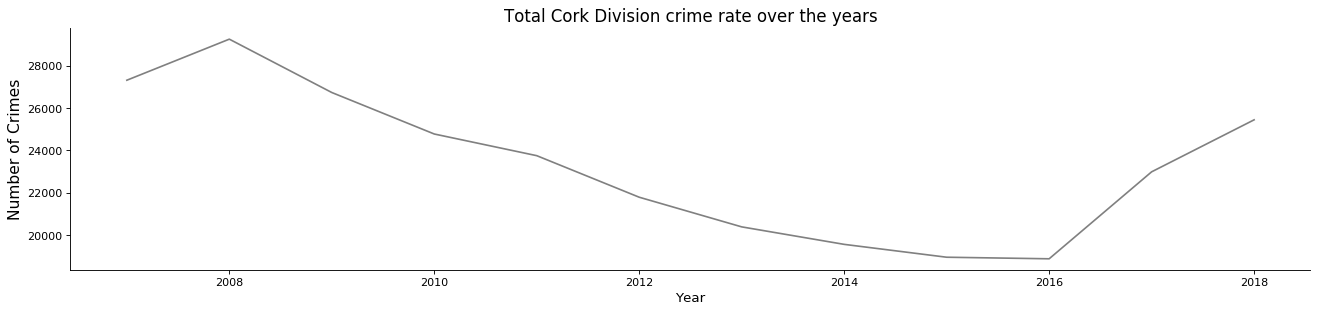

In [16]:
fig, ax = standard_plot('Total Cork Division crime rate over the years')
sns.lineplot(data = df3_cork, x='Year', y='Number.of.Crime.Record', color='gray', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes')

In [17]:
#Now let's look at Station wise crime rates

#Ireland_crime3 = Ireland_crime1[["Station","Year","Number.of.Crime.Record"]]
Ireland_crime3

NameError: name 'Ireland_crime3' is not defined

In [18]:
# Handling null values of Sations 

prev = ''
for index, row in Ireland_crime3.iterrows():
    i = row['Station']
    if isinstance(i, str):
        prev = i 
    else:  
        Ireland_crime3.Station[index] = prev

NameError: name 'Ireland_crime3' is not defined

In [19]:
# Now making Station column an index

#Ireland_crime3.set_index('Station',inplace = True)
#Ireland_crime3 = Ireland_crime3.reset_index()

In [20]:
# Now taking mean of all the crimes over the year in some stations

Ireland_crime_mean = Ireland_crime3.groupby(['Station']).mean()
Ireland_crime_mean = Ireland_crime_mean.reset_index()
Ireland_crime_mean.head()

NameError: name 'Ireland_crime3' is not defined

In [21]:
Ireland_crime_mean = Ireland_crime_mean.drop("Year",axis=1)
Ireland_crime_mean.head()

NameError: name 'Ireland_crime_mean' is not defined

NameError: name 'Ireland_crime_mean' is not defined

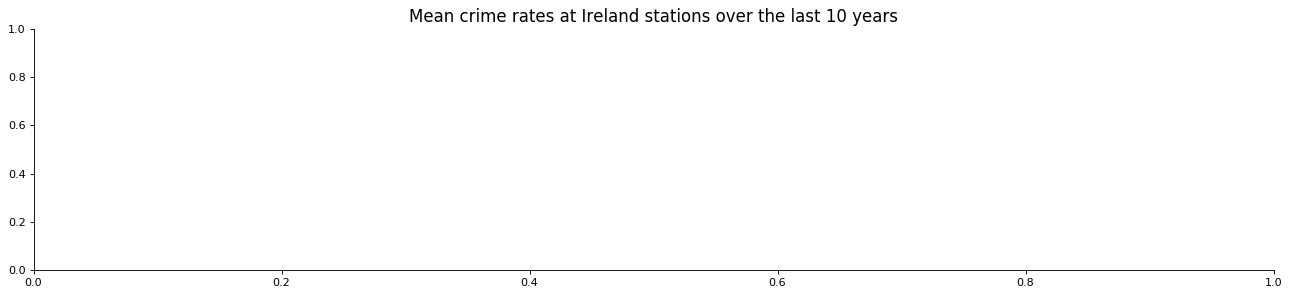

In [22]:
fig, ax = standard_plot('Mean crime rates at Ireland stations over the last 10 years')
sns.lineplot(data=Ireland_crime_mean, x='Station', y='Number.of.Crime.Record', color='red', ax=ax)
ax.set_xlabel('Station')
ax.set_ylabel('Number of Crimes');